# Intro to geopandas

Import with standard abbr.

In [1]:
import geopandas as gpd

import matplotlib.pyplot as plt

## Data

We will use simplified data about wild pig sightings in CA (*Sus scrofa*).

Data is from Global Biodiversity Information Facility (GBIF).

Read in the shapefile using geopandas function gdp.read_file()

In [4]:
# read in the data
pigs = gpd.read_file('data/gbif_sus_scroga_california/gbif_sus_scroga_california.shp')

pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


## 'Geoseries' and 'GeoDataFrame'

Core structure of GeoPandas is 'geopandas.GeoDataFrame'

'geopandas.GeoDataFrame' = pandas.DataFrame with a dedicated geometry column.

The geometry column holds the geometry (point, polygon ect.) of each spatial feature. This column is type geopandas.GeoSeries

The other columns are pd.Series type

In [5]:
# type of pigs df
print(type(pigs))

# type of geometry column
print(type(pigs.geometry))

# type of gbifID column
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


In [6]:
# check the data type of the columns

pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

## Geometric Information

Two other important attributes of a gdp.GeoDataFrame are units of coordinate reference system (CRS).

CRS are instructions to locate each feature on Earth's surface

We can access the CRS of the geo-dataframe using crs attribute

In [7]:
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The *extent* of the geo-dataframe is the bounding box covering all of the features in the df

We access info to create the extent of a geo-dataframe using the 'total_bounds' attribute

In [8]:
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

## Data Wrangling

Geopandas is built on top of 'pandas', so wrangling is the same

Example:

We only want to use recent data for the wild pig obs.

In [10]:
# What years do we have?
pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

We can use our usual data selection

In [13]:
# select data > 2021
pigs_recent = pigs[pigs.year>= 2020]

print(len(pigs))

print(len(pigs_recent))

pigs_recent.head()

1046
606


,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
61,4424675671,Sus scrofa,California,NaN,23.0,9.0,2023.0,iNaturalist,Observations,186357811,madamcoyote,POINT (-124.28580 40.32482)
62,4424357894,Sus scrofa,California,NaN,6.0,10.0,2023.0,iNaturalist,Observations,186474363,skullroy,POINT (-120.82724 35.34895)
63,4424357588,Sus scrofa,California,NaN,5.0,10.0,2023.0,iNaturalist,Observations,186333783,Brian Ahern,POINT (-121.71683 37.34602)
64,4424288359,Sus scrofa,California,NaN,7.0,10.0,2023.0,iNaturalist,Observations,186602594,Steph,POINT (-119.62832 37.28900)
65,4424285723,Sus scrofa,California,NaN,5.0,10.0,2023.0,iNaturalist,Observations,186479844,natleecrockett,POINT (-121.77317 37.50025)


## Plotting

### 'plot()'

gpd.GeoDataFrame has a plot() method

The geospatial info will be auto. used to create axes of plot

Example:

Quick plot of recent pig sightings

<AxesSubplot:>

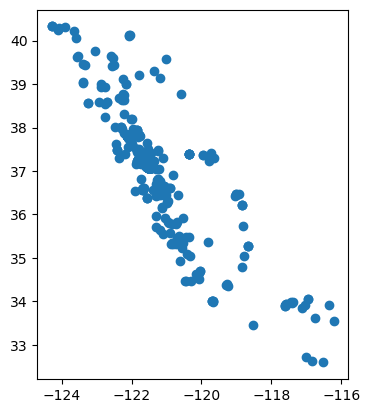

In [14]:
pigs_recent.plot()

## matplotlib -> 'fig'  and 'ax'

We use matplotlib to create more complex, customized graphs (maps)

We can interact with matplotlib via its pyplot interface, which we imported as:

'import matplotlib.pyplot as ply'

Matplotlib graphs the data in a *figure*, which can have 1 or more axes

The axis is *only* the aea specified by the x-y axis and what is plotted in it.

To initialize a blank figure:

1. Initialize a blank figure and axes by calling 'pyplot' and 'subplots()'
2. show the graph using plt.show()



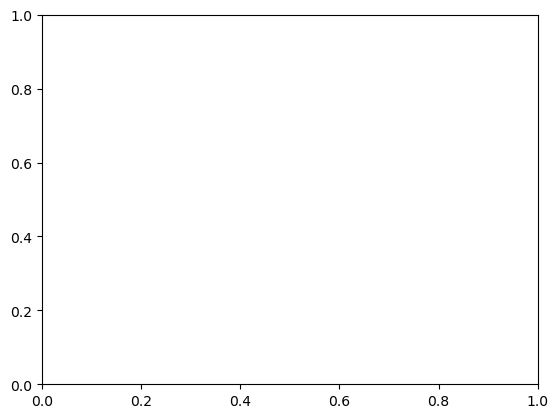

In [29]:
# Create a blank figure and an empty axis
fig, ax = plt.subplots()
# display figure
plt.show()

## Adding a layer

When using 'matplotlib', it can be useful to think of creating a plot and then adding layers to an axis

# create a new figure
fig, ax = plt.subplot()

# plot df on the ax axis
df.plot(ax=ax,
        ...) # other arguments for plot function
        
# display data
plt.show()

Example:

The first layer we want to add to our axis is the 'pigs_recent' point data

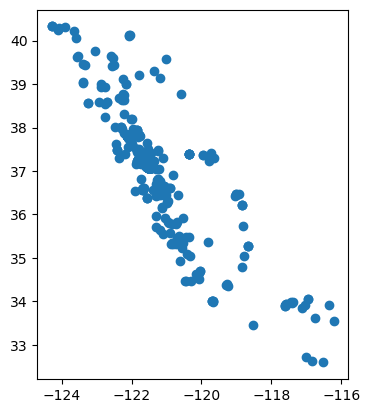

In [16]:
# create a new fig and axis
fig, ax = plt.subplots()

# add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax)

plt.show()

## Customization

Matplotlib allows for a lot of customization.
Some can be done directly in the 'plot()' function, while others is done by updating attributes from the axis 'ax'

some basic customization of pigs

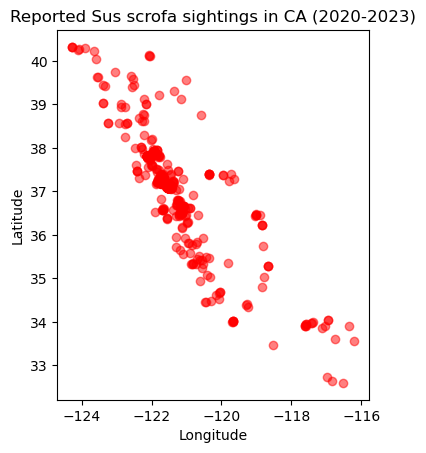

In [25]:
# initialize empty figure
fig, ax = plt.subplots()

# add data to axis
pigs_recent.plot(ax=ax,
                alpha=0.5,
                color='red')
# update axis
ax.set_title("Reported Sus scrofa sightings in CA (2020-2023)")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# show plot
plt.show()

## Exercise

1. Open the CA boundary shapefile and store as ca_boundary variable. How many features does it have?
2. Add it to the pig sightings graph so that the CA boundary appears behind the points.

Can use .geom_type() to find out if data is point, polygon ect.

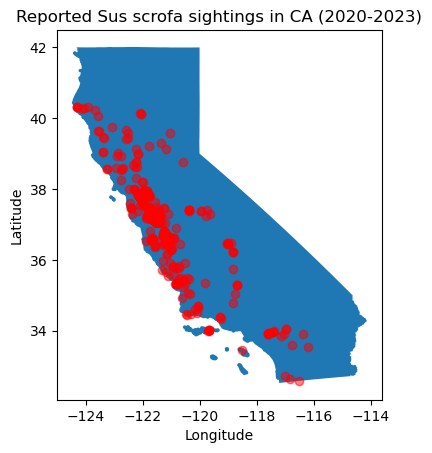

In [27]:
# import ca_boundary data
ca_boundary = gpd.read_file("data/ca-boundary/ca-boundary.shp")

fig, ax = plt.subplots()

# add data to axis
ca_boundary.plot(ax=ax) # this line needs to come before for the map to be *behind* the points
pigs_recent.plot(ax=ax,
                alpha=0.5,
                color='red')
# update axis
ax.set_title("Reported Sus scrofa sightings in CA (2020-2023)")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# show plot
plt.show()